# Исследование объявлений о продаже квартир

**Цель исследования:**
- Определить параметры влияющие на цену недвижимости в Санкт-Петербурге

## 1. Обзор данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('max_colwidth', 400)
sns.set(rc={'figure.figsize':(16, 7)})

In [4]:
data = pd.read_csv('/Users/yusuf/Desktop/Programming/Projects/Data/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- Есть пропуски по высоте потолков, думаю надо попробовать заменить на среднее значение по типу местности. С показателем общего количества этажей - то же самое. 
- С пропусками по жилой площади и кухне чуть сложнее, на среднее заменить нельзя, так как сумма должна равняться общей площади. Можно, так как общая площадь нигде не пропущена, заменить жилую на среднее по количеству комнат, а кухни найти уже как разницу общей и жилой.

In [5]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


- Значение NaN в столбце апартаментов можно заменить на False, я думаю это и есть причина пропуска.
- К балконами NaN можно заменить на 0, так как это и подразумевалось я думаю
- С пропусками по населенным пункат по сложнее, надо думать
- Расстояние до аэропорта - среднее по населенному пункту, тоже самое с центром города
- У парков NaN на 0, так как это дачи в основном
- Расстояние до ближайшего парка - среднее по населенному пункту. Если город - определит правильно, так как озеленение сейчас идет полным ходом, если поселок, то 0
- То же самое с водоемами 

## 2. Предобработка данных

Первичная обработка: произведу замену в ошибочном значении (скорее всего ошиблись при внесении данных) и дропну пропуски по населенным пунктам, так как далее они будут мешать закрытию пробелов с помощью медианных значений, по этим самым населенным пунктам.

In [6]:
data['floors_total'] = data['floors_total'].replace(14.5, 14) 
data = data.dropna(subset = ['locality_name']) 

Закрытие пробелов на медианные значения (где пропуски по причине недостатка данных). Медианные значения в данном случае лучше всего проводить по типу местности

In [7]:
data['ceiling_height'].fillna(value = data.groupby(['locality_name'])['ceiling_height'].transform('median'), inplace = True)
data['floors_total'].fillna(value = data.groupby(['locality_name'])['floors_total'].transform('median'), inplace = True)
data['cityCenters_nearest'].fillna(value = data.groupby(['locality_name'])['cityCenters_nearest'].transform('median'), inplace = True)
data['parks_nearest'].fillna(value = data.groupby(['locality_name'])['parks_nearest'].transform('median'), inplace = True)
data['ponds_nearest'].fillna(value = data.groupby(['locality_name'])['ponds_nearest'].transform('median'), inplace = True)
data['airports_nearest'].fillna(value = data.groupby(['locality_name'])['airports_nearest'].transform('median'), inplace = True)

Закрытие пробелов на нули (где пропуск означает ноль)

In [8]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['is_apartment'].fillna(value = 'False', inplace = True) #Na, означает False, что нулем и является в каком-то смысле

Закрытие пробелов на "заглушки", чтобы не срезались нужные данные. Сделаем их отрицательными

In [9]:
data['days_exposition'] = data['days_exposition'].fillna(-10)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-10)

Пробелы в площади: жилую закрываем средней по количеству комнат, а кухню расчитываем как разницу между общей и жилой

In [10]:
data['living_area'].fillna(value = data.groupby(['rooms'])['living_area'].transform('median'), inplace = True)
data['kitchen_area'].fillna(value = data['total_area'] - data['living_area'], inplace = True)

Замена типа данных на целые числа и временной формат

In [11]:
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Корректировка "высоких" значений высоты потолков от 24 (очевидная ошибка), так как 2.4 это минимальная высота потолка в доме

In [12]:
def ceiling(number):
    if number >= 24: 
        number = number/10
    return number
 
data['ceiling_height'] = data['ceiling_height'].apply(ceiling)

Корректировка "больших" значений общей площади

In [13]:
def area(number):
    if number >= 300:
        number = number/10
    return number

data['total_area'] = data['total_area'].apply(area)

Посмотрим, что у нас получилось

In [14]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-10
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.70,14,45.00,9,False,False,False,114.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,-10.0,0,NaN,0,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,733.0,0,593.0,155
7,5,7915000,71.60,2019-04-18,2,2.70,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,460.0,0,503.0,-10
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,-10.0,0,NaN,0,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,460.0,0,503.0,289


## 3. Расчёты и добавление результатов в таблицу

Расчет цены квадратного метра

In [15]:
data['square'] = (data['last_price'] / data['total_area']).astype(int)

День недели, месяц и год публикации

In [16]:
data['first_day_weekday'] = data['first_day_exposition'].dt.weekday
data['first_day_month'] = data['first_day_exposition'].dt.month
data['first_day_year'] = data['first_day_exposition'].dt.year

data['weekday'] = data['first_day_weekday'].replace({0 : 'Понедельник', 1 : 'Вторник', 2 :  'Среда', 3 : 'Четверг', 4 : 'Пятница', 5 : 'Суббота', 6 : 'Воскресенье' })
data['month'] = data['first_day_month'].replace({1 : 'Январь', 2 : 'Февраль', 3 :  'Март', 4 : 'Апрель', 5 : 'Май', 6 : 'Июнь', 7 : 'Июль', 8 : 'Август', 9 :  'Сентябрь', 10 : 'Октябрь', 11 : 'Ноябрь', 12 : 'Декабрь' })

Этаж квартиры: первый, последний, другой

In [17]:
def floor_number(row):
    number = row['floor']
    floors_total = row['floors_total']
    if number == 1:
        return 'Первый'
    if number == floors_total:
        return 'Последний'
    else:
        return 'Другой'
    
data['floor_number'] = data.apply(floor_number, axis = 1)

Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [18]:
data['living_ratio'] = ((data['living_area'] / data['total_area']) * 100).round(1).astype(str) + '%'
data['kitchen_ratio'] = ((data['kitchen_area'] / data['total_area']) * 100).round(1).astype(str) + '%'

Посмотрим, что получилось

In [19]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square,first_day_weekday,first_day_month,first_day_year,weekday,month,floor_number,living_ratio,kitchen_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-10,120370,3,3,2019,Четверг,Март,Другой,47.2%,23.1%
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81,82920,1,12,2018,Вторник,Декабрь,Первый,46.0%,27.2%
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,3,8,2015,Четверг,Август,Другой,61.2%,14.8%
3,0,64900000,159.00,2015-07-24,3,2.70,14,45.00,9,False,False,False,114.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176,4,7,2015,Пятница,Июль,Другой,28.3%,71.7%
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018,Вторник,Июнь,Другой,32.0%,41.0%
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,-10.0,0,NaN,0,NaN,55,95065,0,9,2018,Понедельник,Сентябрь,Другой,47.4%,29.9%
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,733.0,0,593.0,155,99195,3,11,2017,Четверг,Ноябрь,Другой,28.4%,38.6%
7,5,7915000,71.60,2019-04-18,2,2.70,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,460.0,0,503.0,-10,110544,3,4,2019,Четверг,Апрель,Другой,42.6%,26.4%
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,-10.0,0,NaN,0,NaN,189,87454,2,5,2018,Среда,Май,Другой,46.5%,26.6%
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,460.0,0,503.0,289,88524,6,2,2017,Воскресенье,Февраль,Другой,71.5%,10.7%


## 4. Исследовательский анализ данных

Изучение параметров

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Text(0.5, 1.0, 'Цена квартир из объявлений')

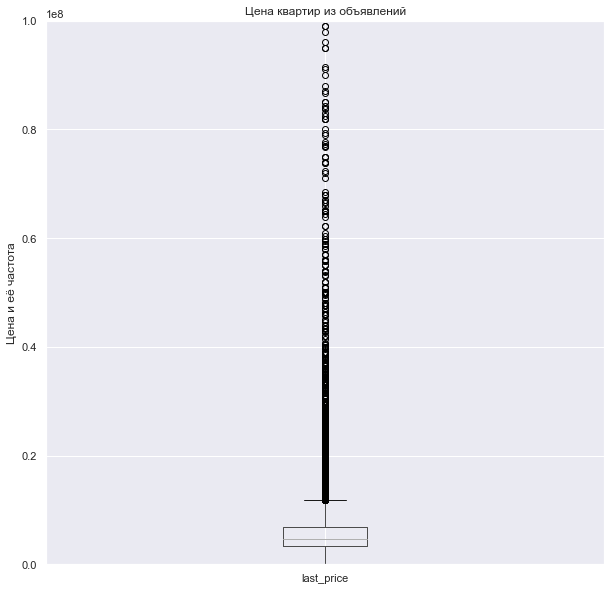

In [22]:
print(data['last_price'].describe())
data.boxplot('last_price', grid=True, figsize=(10,10))
plt.ylim(-1,100000000)
plt.ylabel('Цена и её частота')
plt.title('Цена квартир из объявлений')

Нормальная цена квартир в пределах 12 млн рублей, посмотрим сколько таких квартир.

In [23]:
def persentage_of_outliers(condition):
    print('Процент выбросов: {:.2%}'.format(len(data.query(condition)) / len(data)),condition)
          
persentage_of_outliers('last_price > 12000000')

Процент выбросов: 8.19% last_price > 12000000


Получилось многовато, попробуем найти и отсечь действительно редкие значения. До цены в 4 млн идет сплошная линия, скорее всего это квартиры в центре

In [24]:
def persentage_of_outliers(condition):
    print('Процент выбросов: {:.2%}'.format(len(data.query(condition)) / len(data)),condition)
          
persentage_of_outliers('last_price > 40000000')

Процент выбросов: 0.77% last_price > 40000000


In [25]:
data_new = data.query('last_price < 40000000')

Text(0.5, 1.0, 'Цена квартир из объявлений')

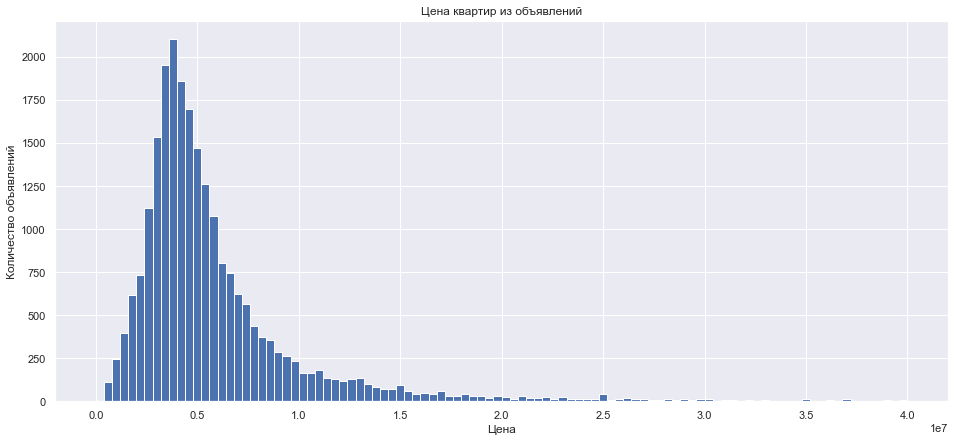

In [26]:
data_new['last_price'].hist(bins=100, range=(0,40000000))
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.title('Цена квартир из объявлений')

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Text(0.5, 1.0, 'Количество комнат в квартирах из объявлений')

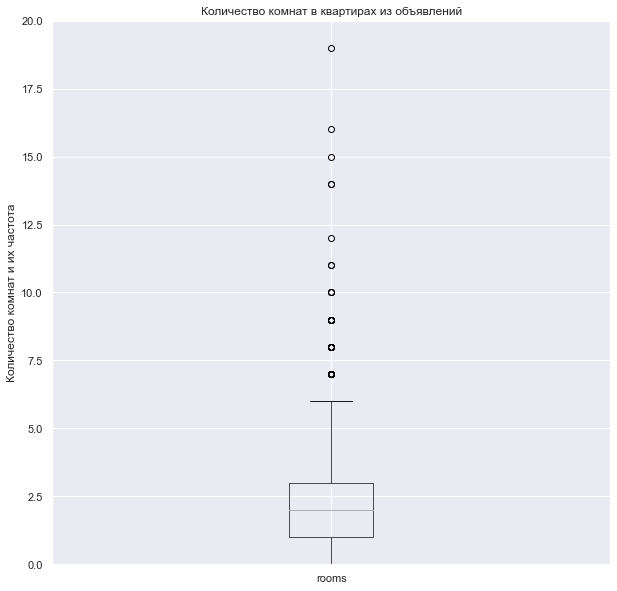

In [47]:
print(data['rooms'].describe())
data.boxplot('rooms', grid=True, figsize=(10,10))
plt.ylim(0,20)
plt.ylabel('Количество комнат и их частота')
plt.title('Количество комнат в квартирах из объявлений')

Верхняя граница нормального числа комнат 6, посмотрим сколько лишнего

In [28]:
def persentage_of_outliers(condition):
    print('Процент выбросов: {:.3%}'.format(len(data_new.query(condition)) / len(data_new)),condition)
          
persentage_of_outliers('rooms > 6')

Процент выбросов: 0.281% rooms > 6


Спокойно отсекаем лишнее

In [29]:
data_new2 = data_new.query('rooms < 6')

Text(0.5, 1.0, 'Количество комнат в квартирах из объявлений')

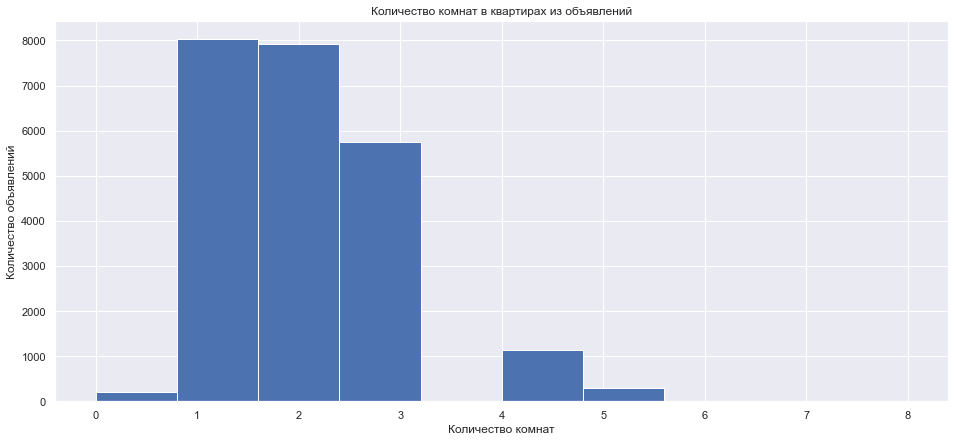

In [37]:
data_new2['rooms'].hist(bins=10, range=(0,8))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Количество комнат в квартирах из объявлений')

count    23529.000000
mean         2.708723
std          0.334348
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         22.600000
Name: ceiling_height, dtype: float64


Text(0.5, 1.0, 'Высота потолков квартир из объявлений')

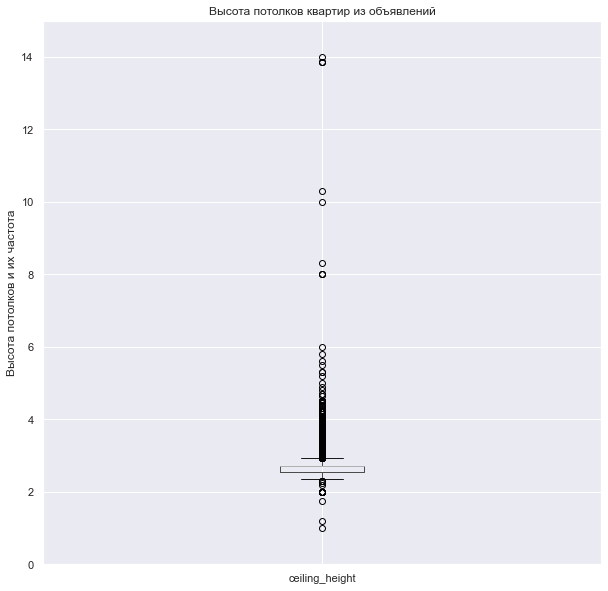

In [38]:
print(data['ceiling_height'].describe())
data.boxplot('ceiling_height', grid=True, figsize=(10,10))
plt.ylim(0,15)
plt.ylabel('Высота потолков и их частота')
plt.title('Высота потолков квартир из объявлений')

Верхняя граница нормальной высоты потолков в районе 3, при этом большое количество значений тянется вплоть до 4, а нижняя 2.4 - это минимальная высота потолка в доме. Посмотрим сколько лишнего

In [39]:
def persentage_of_outliers(condition):
    print('Процент нормального распределения: {:.4%}'.format(len(data_new2.query(condition)) / len(data_new2)),condition)
          
persentage_of_outliers('2.4 <= ceiling_height <= 4')

Процент нормального распределения: 99.2060% 2.4 <= ceiling_height <= 4


Можно смело отсекать

In [40]:
data_new3 = data_new2.query('2.4 <= ceiling_height <= 4')

Text(0.5, 1.0, 'Высота потолков квартир из объявлений')

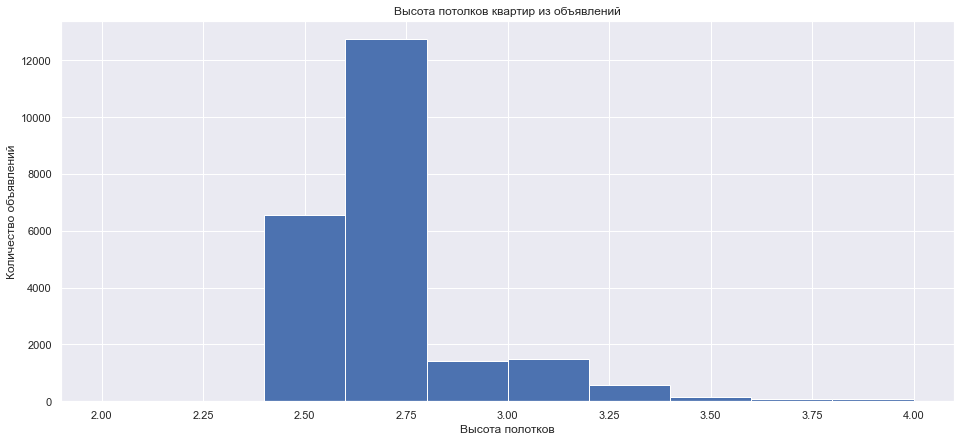

In [41]:
data_new3['ceiling_height'].hist(bins=10, range=(2,4))
plt.xlabel('Высота полотков')
plt.ylabel('Количество объявлений')
plt.title('Высота потолков квартир из объявлений')

count    23650.000000
mean        59.358687
std         30.438648
min         12.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        297.500000
Name: total_area, dtype: float64


Text(0.5, 1.0, 'Площадь квартир из объявлений')

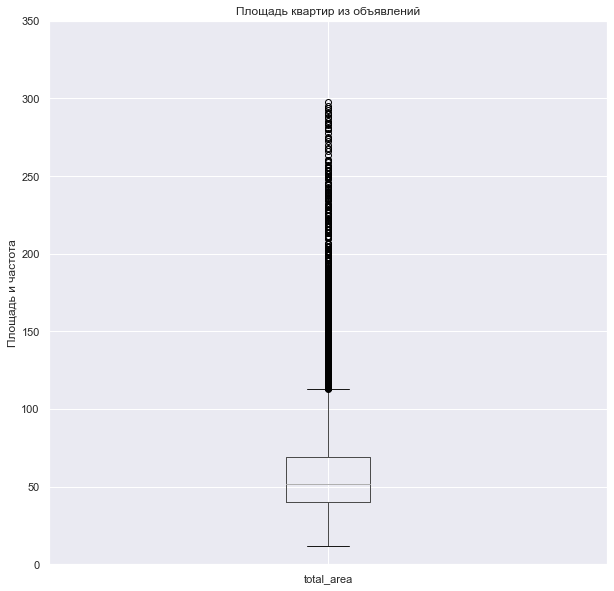

In [42]:
print(data['total_area'].describe())
data.boxplot('total_area', grid=True, figsize=(10,10))
plt.ylim(0,350)
plt.ylabel('Площадь и частота')
plt.title('Площадь квартир из объявлений')

Верхняя граница нормальной обощей площади 120 метров, посмотрим сколько это

In [43]:
def persentage_of_outliers(condition):
    print('Процент нормального распределения: {:.2%}'.format(len(data_new3.query(condition)) / len(data_new3)),condition)
          
persentage_of_outliers('total_area > 150')

Процент нормального распределения: 1.22% total_area > 150


Прекрасно, можно отсекать еще смелее

In [44]:
data_new4 = data_new3.query('total_area < 150')

Text(0.5, 1.0, 'Площадь квартир из объявлений')

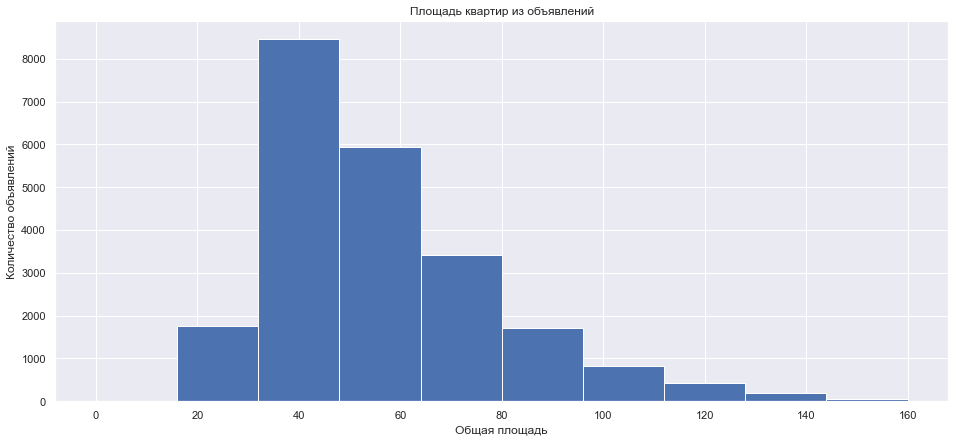

In [45]:
data_new4['total_area'].hist(bins=10, range=(0,160))
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.title('Площадь квартир из объявлений')

После чистки оценим долю отброшенных данных к исходному датафрейму:

In [46]:
print('Доля отброшенных данных: {:.2%}'.format(1 - len(data_new4) / len(data)))

Доля отброшенных данных: 3.52%


Краткий вывод:

После среза выбросов по усам, можно определить тенденции - по количеству комнат (1-2 комнаты), цене (4 миллиона), высоте потолков (2.7), площади (40-50 квадратов)

### Время продажи квартиры

count    19842.000000
mean       177.945116
std        217.047217
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64


(0.0, 1500.0)

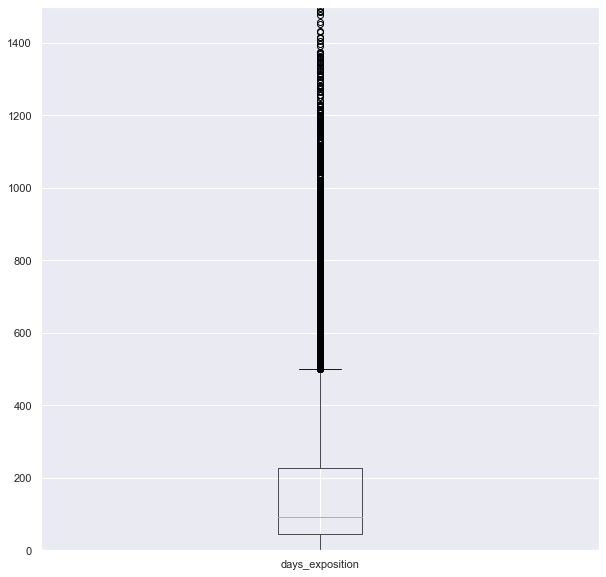

In [48]:
data_days = data_new4.query('days_exposition > 0')
print(data_days['days_exposition'].describe())
data_days.boxplot('days_exposition', grid=True, figsize=(10,10))
plt.ylim(0,1500)

После верхнего уса, плотность значений начинает снижаться только после 1000, посмотрим сколько это и отсечем лишнее

In [40]:
def persentage_of_outliers(condition):
    print('Процент нормального распределения: {:.2%}'.format(len(data_days.query(condition)) / len(data_days)),condition)
          
persentage_of_outliers('days_exposition > 1000')

Процент нормального распределения: 1.28% days_exposition > 1000


Можно отсекать

Text(0.5, 1.0, 'Срок размещения квартир из объявлений')

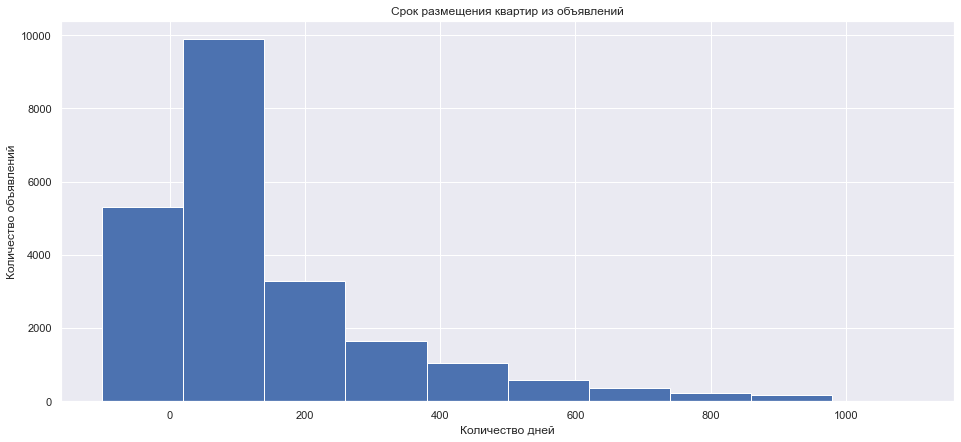

In [41]:
data_new5 = data_new4.query('days_exposition < 1000')
data_new5['days_exposition'].hist(bins=10, range=(-100,1100))
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.title('Срок размещения квартир из объявлений')

Еще раз посмотрим на общее количество отброшенных данных

In [42]:
print('Доля отброшенных данных: {:.2%}'.format(1 - len(data_new5) / len(data)))

Доля отброшенных данных: 4.60%


Большая часть квартир продается в первый квартал, в следующий квартал продается примерно в 2,5 раза меньше квартир, так же с 3 и 4 кварталами. Далее медленно продаются остатки.
Продажу квартиры можно считать очень быстрой, если она проходит в первые 3 месяца после размещения объявления, и очень долгой, если продажа происходит спустя 2 года, после размещения.
При этом, большую часть объявлений занимают те, что еще не проданы - это видно по отрицательным заглушкам.

### Факторы влияния на стоимость квартир

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


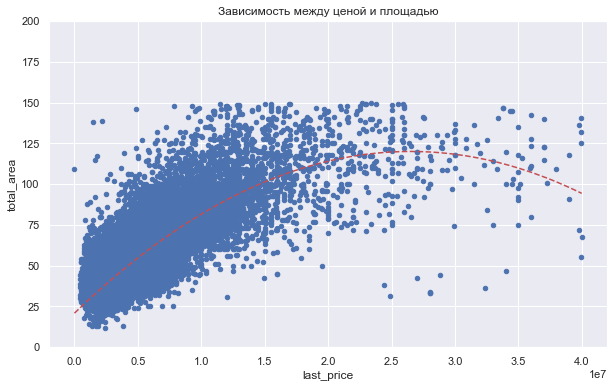

In [43]:
sorted_data_price = data_new5.sort_values('last_price')
sorted_data_price.plot(x='last_price', y='total_area', kind='scatter', title='Зависимость между ценой и площадью', ylim=(0, 200), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['total_area'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

Прямая зависимость цены от площади.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


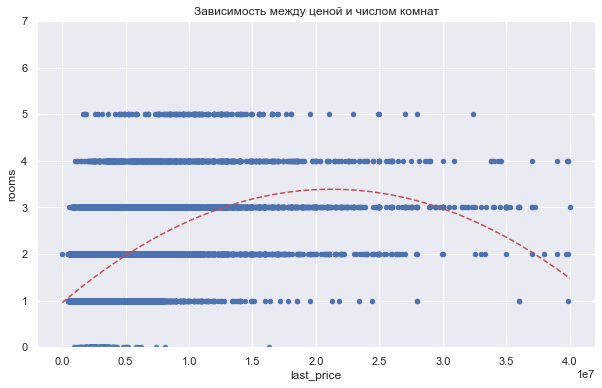

In [44]:
sorted_data_price.plot(x='last_price', y='rooms', kind='scatter', title='Зависимость между ценой и числом комнат', ylim=(0, 7), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['rooms'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

С числом комнат цена растет до 3 комнаты. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


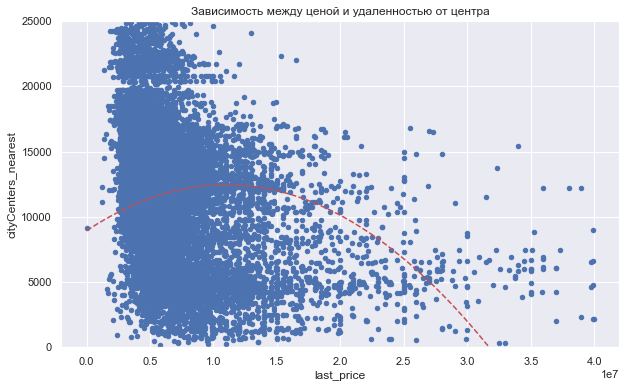

In [45]:
sorted_data_price.query('cityCenters_nearest > 0').plot(x='last_price', y='cityCenters_nearest', kind='scatter', title='Зависимость между ценой и удаленностью от центра', ylim=(0, 25000), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['cityCenters_nearest'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

Цена растет приближаясь к центру

<AxesSubplot:xlabel='floor_number'>

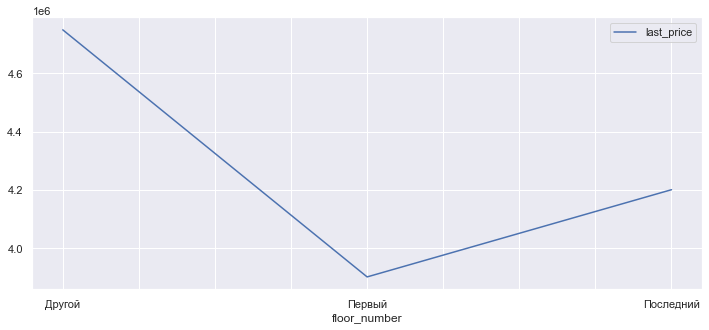

In [46]:
(sorted_data_price.pivot_table(index='floor_number', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5)))

На первом этаже квартиры дешевле всего, на последнем цена средняя, самые дорогие квартиры где-то между

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


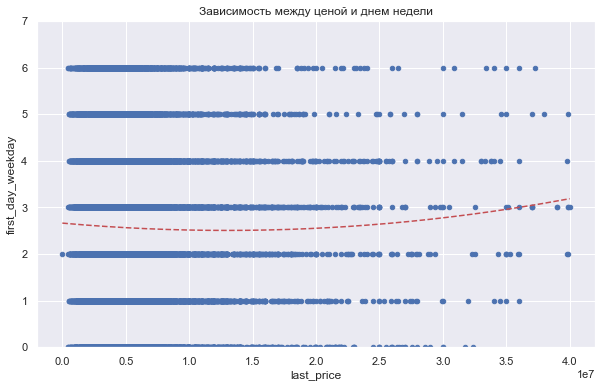

In [47]:
sorted_data_price.plot(x='last_price', y='first_day_weekday', kind='scatter', title='Зависимость между ценой и днем недели', ylim=(0, 7), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['first_day_weekday'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

Зависимость между ценой и днем недели отсутствует

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


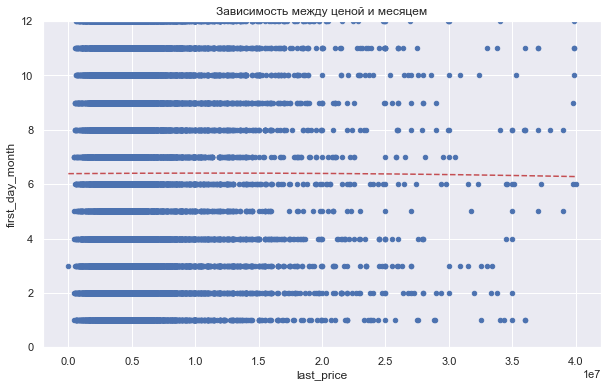

In [48]:
sorted_data_price.plot(x='last_price', y='first_day_month', kind='scatter', title='Зависимость между ценой и месяцем', ylim=(0, 12), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['first_day_month'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

Зависимость между ценой и месяцем отсутствует

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


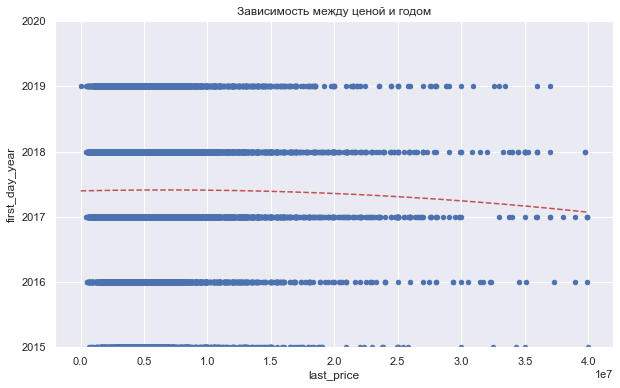

In [49]:
sorted_data_price.plot(x='last_price', y='first_day_year', kind='scatter', title='Зависимость между ценой и годом', ylim=(2015, 2020), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['first_day_year'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

Зависимость между ценой и годом отсутствует. Посмотрим на коэффициенты корреляции

In [50]:
data_new5.query('cityCenters_nearest > 0 and days_exposition > 0').corr()[['last_price']]

,last_price
total_images,0.149634
last_price,1.000000
total_area,0.764905
rooms,0.475049
ceiling_height,0.395811
floors_total,0.008769
living_area,0.630331
floor,0.030739
studio,-0.053004
open_plan,-0.031975


Сильнее всего цена коррелирует от размера площади, далее от количества комнат и высоты потолков. Также на цену влияют парки и пруды поблизости, и, как ни странно, количество фотографий

### 4.1 10 населенных пунктов по числу объявлений

In [51]:
by_locality_name = data_new5.pivot_table(index = 'locality_name', values = 'square', aggfunc = ['mean', 'count'])
by_locality_name = by_locality_name.sort_values(by=('count', 'square'), ascending = False).head(10)
display(by_locality_name)

,mean,count
,square,square
locality_name,,
Санкт-Петербург,111458.518947,14884
посёлок Мурино,85867.390716,517
посёлок Шушары,78615.348624,436
Всеволожск,68765.447570,391
Пушкин,102930.193182,352
Колпино,75279.280597,335
посёлок Парголово,90259.320000,325
Гатчина,68745.693811,307


Самый дорогой квадратный метр ожидаемо в Санкт-Петербурге - 111 тысячи рублей, наименее дорогой в Выборге - 58 тысяч рублей за квадрат.

### 4.2 Расстояние до центра

In [52]:
data_new5['center_dist'] = (data_new5['cityCenters_nearest'] / 1000).astype(int)

/Users/yusuf/opt/anaconda3/envs/praktikum_env_macos2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


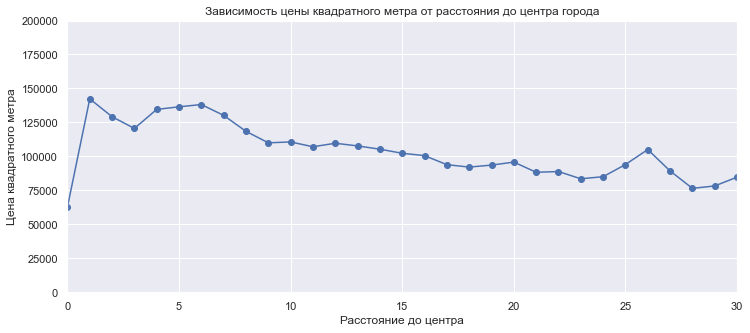

In [53]:
data_new5.groupby('center_dist')['square'].mean().plot(x='center_dist',
y='square',
style='o-',
xlim=(0, 30),
ylim=(0, 200000),
figsize=(12, 5),
grid=True)
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена квадратного метра')
plt.title('Зависимость цены квадратного метра от расстояния до центра города')

data_new5_center = data_new5.query('center_dist <= 8')

Отдаляясь от центра, цена за квадрат падает, с небольшим скачком в районе 27 км - это может элитный квартал. Также небольшая просадка в районе значения 3 км, может означать неблагоприятный квартал у центра. А в целом всё закономерно. Центральная зона отделена в районе 8 км

In [54]:
display(data_new5_center.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square,first_day_weekday,first_day_month,first_day_year,weekday,month,floor_number,living_ratio,kitchen_ratio,center_dist
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018,Вторник,Июнь,Другой,32.0%,41.0%,8
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,-10.0,0,NaN,0,NaN,55,95065,0,9,2018,Понедельник,Сентябрь,Другой,47.4%,29.9%,0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,-10.0,0,NaN,0,NaN,189,87454,2,5,2018,Среда,Май,Другой,46.5%,26.6%,0
12,10,3890000,54.00,2016-06-30,2,2.60,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,-10.0,0,NaN,0,NaN,90,72037,3,6,2016,Четверг,Июнь,Последний,55.6%,16.7%,0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,-10.0,0,NaN,0,NaN,60,86206,0,4,2017,Понедельник,Апрель,Другой,51.7%,19.0%,0
24,8,6500000,97.20,2015-10-31,2,2.70,3,46.50,1,False,False,False,19.60,0,Санкт-Петербург,20052.0,2336.0,3,411.0,3,124.0,265,66872,5,10,2015,Суббота,Октябрь,Первый,47.8%,20.2%,2
30,12,2200000,32.80,2018-02-19,1,2.56,9,17.60,2,False,False,False,15.20,0,Коммунар,NaN,-10.0,0,NaN,0,NaN,63,67073,0,2,2018,Понедельник,Февраль,Другой,53.7%,46.3%,0
35,6,15500000,149.00,2017-06-26,5,2.70,5,104.00,4,False,False,False,17.00,0,Санкт-Петербург,23670.0,3502.0,0,460.0,1,779.0,644,104026,0,6,2017,Понедельник,Июнь,Другой,69.8%,11.4%,3
37,10,1990000,45.80,2017-10-28,2,2.50,5,30.50,1,False,False,False,15.30,0,поселок городского типа Красный Бор,NaN,-10.0,0,NaN,0,NaN,196,43449,5,10,2017,Суббота,Октябрь,Первый,66.6%,33.4%,0
38,10,3150000,40.00,2018-03-29,1,2.75,18,16.30,9,False,False,False,11.60,0,посёлок Мурино,NaN,-10.0,0,NaN,0,NaN,103,78750,3,3,2018,Четверг,Март,Другой,40.8%,29.0%,0


В целом, общих черт, кроме того, что квартиры находятся в центре, у них нет. Повторим анализ для центра города

count    8.963000e+03
mean     5.764625e+06
std      5.023781e+06
min      4.300000e+05
25%      2.600000e+06
50%      4.050000e+06
75%      7.350000e+06
max      3.999000e+07
Name: last_price, dtype: float64


(-1.0, 15000000.0)

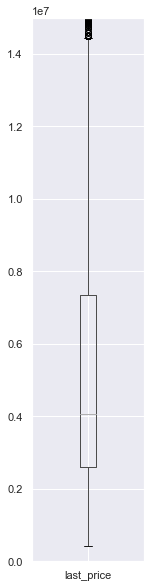

In [55]:
print(data_new5_center['last_price'].describe())
data_new5_center.boxplot('last_price', grid=True, figsize=(2,10))
plt.ylim(-1,15000000)

Text(0.5, 1.0, 'Цена квартир из объявлений (Центр)')

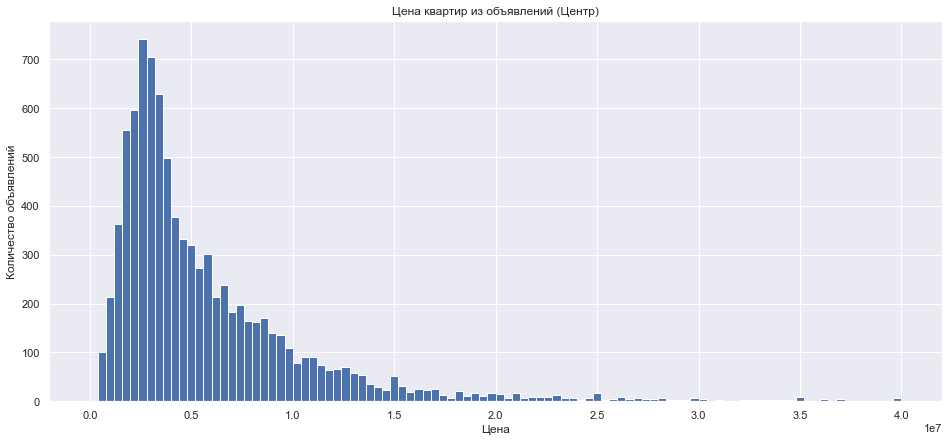

In [56]:
data_new5_center['last_price'].hist(bins=100, range=(0,40000000))
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.title('Цена квартир из объявлений (Центр)')

count    8963.000000
mean        2.083119
std         0.977376
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


(0.0, 6.0)

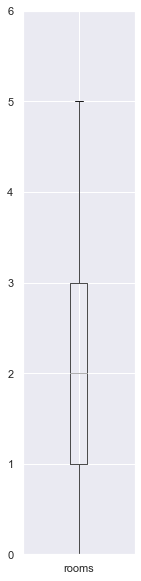

In [57]:
print(data_new5_center['rooms'].describe())
data_new5_center.boxplot('rooms', grid=True, figsize=(2,10))
plt.ylim(0,6)

Text(0.5, 1.0, 'Количество комнат в квартирах из объявлений (Центр)')

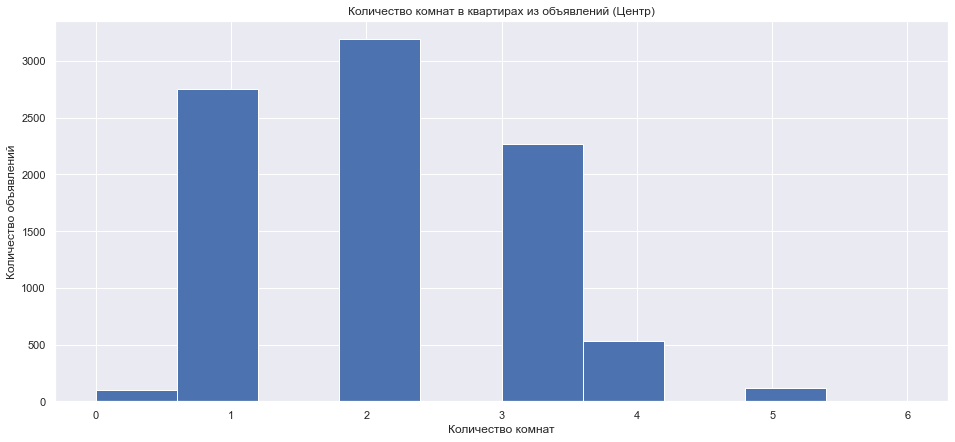

In [58]:
data_new5_center['rooms'].hist(bins=10, range=(0,6))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Количество комнат в квартирах из объявлений (Центр)')

count    8963.000000
mean        2.737080
std         0.255726
min         2.400000
25%         2.550000
50%         2.700000
75%         2.750000
max         4.000000
Name: ceiling_height, dtype: float64


(2.0, 4.0)

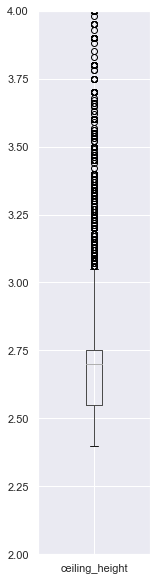

In [59]:
print(data_new5_center['ceiling_height'].describe())
data_new5_center.boxplot('ceiling_height', grid=True, figsize=(2,10))
plt.ylim(2,4)

Text(0.5, 1.0, 'Высота потолков квартир из объявлений (Центр)')

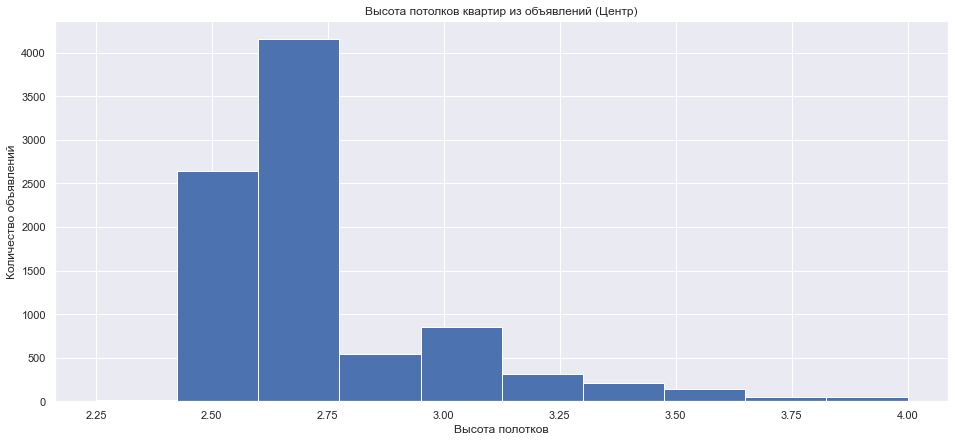

In [60]:
data_new5_center['ceiling_height'].hist(bins=10, range=(2.25,4))
plt.xlabel('Высота полотков')
plt.ylabel('Количество объявлений')
plt.title('Высота потолков квартир из объявлений (Центр)')

Здесь меньше квартир с высотой 2.5, почти все 2.75, в отличии от всего остального города.

count    8963.000000
mean       59.535115
std        25.077636
min        12.000000
25%        41.000000
50%        54.000000
75%        72.950000
max       149.300000
Name: total_area, dtype: float64


(0.0, 150.0)

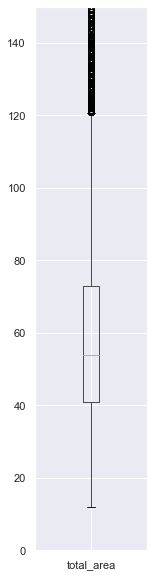

In [61]:
print(data_new5_center['total_area'].describe())
data_new5_center.boxplot('total_area', grid=True, figsize=(2,10))
plt.ylim(0,150)

Text(0.5, 1.0, 'Общая площадь квартир из объявлений (Центр)')

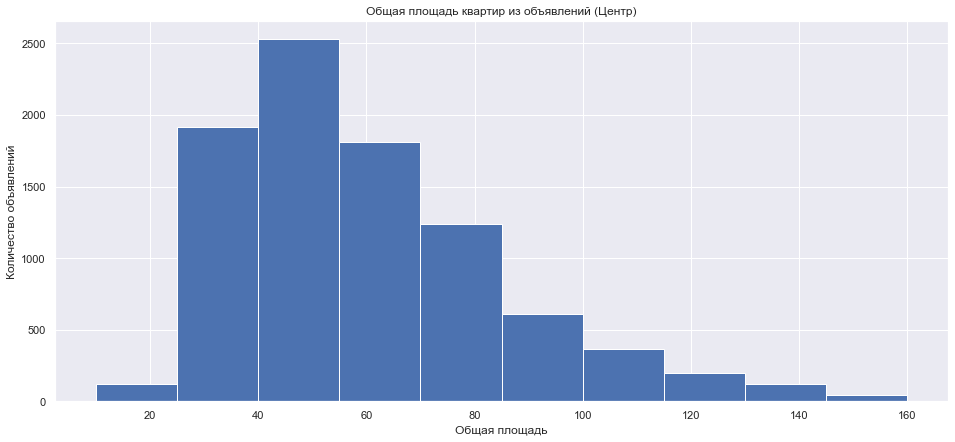

In [62]:
data_new5_center['total_area'].hist(bins=10, range=(10,160))
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.title('Общая площадь квартир из объявлений (Центр)')

Краткий вывод по центру:

Самая частая цена в центре 70 миллионов, а в остальном городе 40.
Число комнат 2, а в остальном городе 1.
Высота потолков 2.7, а в остальном городе 2.5.
Снизилась общая площадь, в центре предпочитают квартиры чуть меньше (до 98 квадратов)

Теперь оценим корреляцию параметров в центре города

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


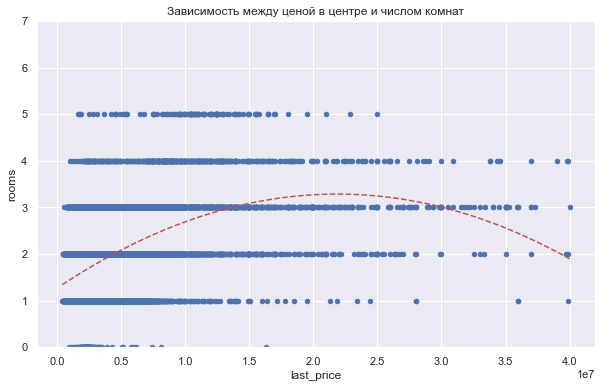

In [63]:
center_sorted_data_price = data_new5_center.sort_values('last_price')
center_sorted_data_price.plot(x='last_price', y='rooms', kind='scatter', title='Зависимость между ценой в центре и числом комнат', ylim=(0, 7), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['rooms'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

В отличии от всего города, в центре цена продолжает расти в районе 3 комнат, но не сильно. Скорее незаметен спад, который есть в городе

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


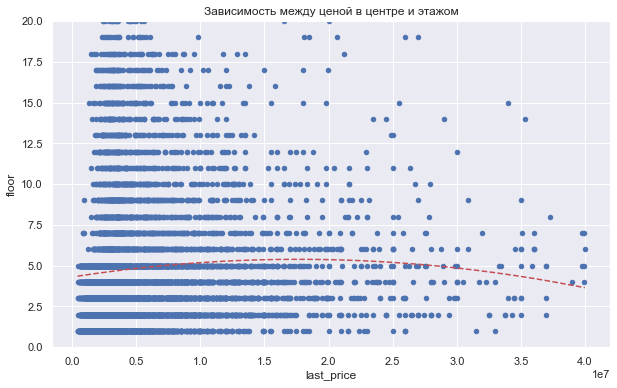

In [64]:
center_sorted_data_price.plot(x='last_price', y='floor', kind='scatter', title='Зависимость между ценой в центре и этажом', ylim=(0, 20), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['floor'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

Дешевле всего на 4 этаже, дороже в районе 6. В городе нижняя планка у 3 этажа и рост цены происходит не так плавно

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


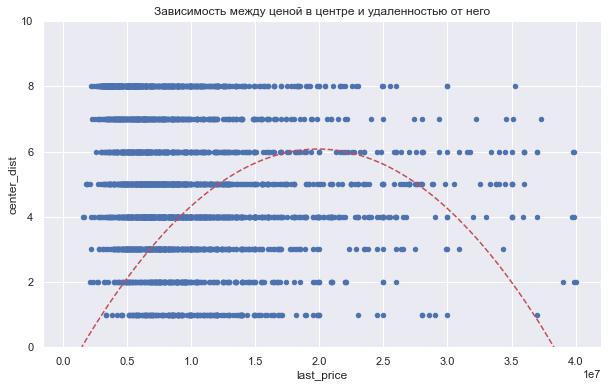

In [65]:
center_sorted_data_price.query('center_dist > 0').plot(x='last_price', y='center_dist', kind='scatter', title='Зависимость между ценой в центре и удаленностью от него', ylim=(0, 10), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['center_dist'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

Цена растет чуть отдаляясь от центра, но недалеко, это могут быть элитные кварталы в пределах центра и потом опять увеличивается приближаясь к нему - самые дорогие квартиры в самом центре Санкт-Петербурга

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


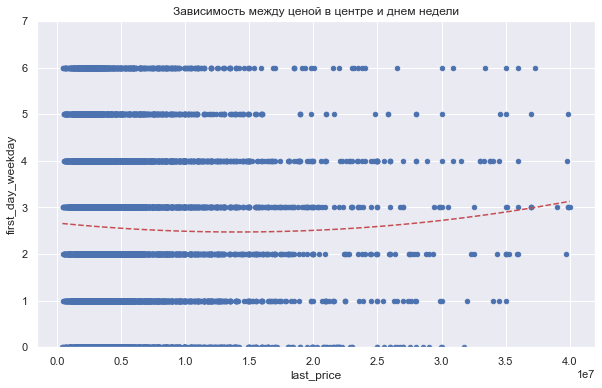

In [66]:
center_sorted_data_price.plot(x='last_price', y='first_day_weekday', kind='scatter', title='Зависимость между ценой в центре и днем недели', ylim=(0, 7), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['first_day_weekday'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


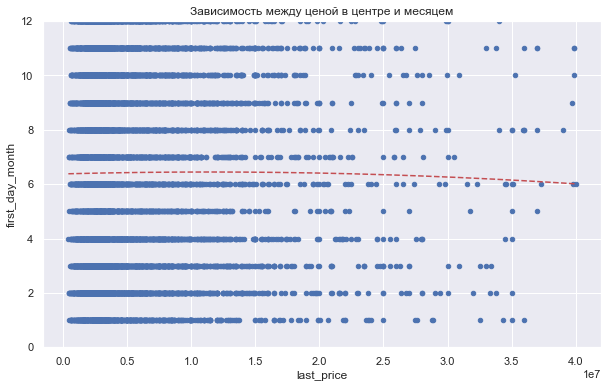

In [67]:
center_sorted_data_price.plot(x='last_price', y='first_day_month', kind='scatter', title='Зависимость между ценой в центре и месяцем', ylim=(0, 12), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['first_day_month'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


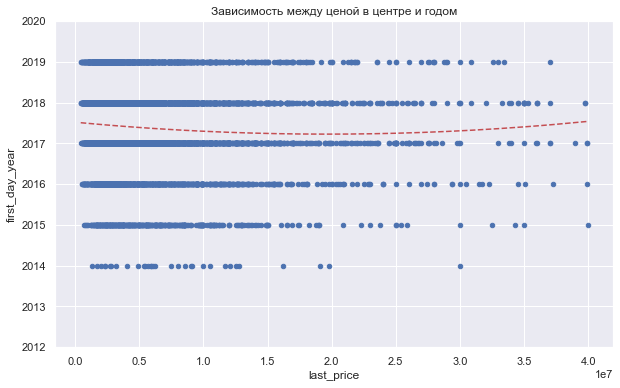

In [68]:
center_sorted_data_price.plot(x='last_price', y='first_day_year', kind='scatter', title='Зависимость между ценой в центре и годом', ylim=(2012, 2020), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['first_day_year'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

В целом по датам отличий не наблюдается.

Посмотрим на корреляции в центре

In [69]:
data_new5_center.query('cityCenters_nearest > 0 and days_exposition > 0').corr()[['last_price']]

,last_price
total_images,0.157422
last_price,1.000000
total_area,0.694411
rooms,0.394879
ceiling_height,0.189578
floors_total,0.082462
living_area,0.529778
floor,0.129481
studio,-0.055458
open_plan,-0.037000


Количество изображений уже не так сильно влияют на цену, как и высота потолков. В отличии от площади и количества комнат

## 5. Общий вывод

- **Краткий обзор проведенной работы:** была выполнена предобработка данных, влючающая  работу с пропусками, ошибочными значениями и типами данных. Была расчитана цена квадратного метра, добавлены дни недели, месяцы и года, этажи и соотношения площадей. Был проведен исследовательский анализ факторов влияния на стоимость квартир
- **Главные выводы:** анализ рынка недвижимости в Санкт-Петербурге показал, что в среднем по городу на цену сильнее всего влияют такие показатели, как: размер площади, количество комнат, высота потолков, а также парки и пруды поблизости - что вполне логично, так как это факторы ценящиеся в любом мегаполисе. В среднем по городу доминируют однокомнатные квартиры, с высотой потолков около 2.4 метра. При этом в центре Санкт-Петербурга высота потолков уже не так важна, хоть и доминирует там значение в 2.7 метра - это историческая часть города, потолки там априори везде высокие, людям важнее общая площадь, балкон, для любования за архитектурой города, количество комнат и размер кухни.